In [5]:
# importing the necessary packages

# packages used for training
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import pandas as pd

# package used for POS-tagging
from spacy.en import English

# packages used for evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# packages used for visualization
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [1]:
# loads the text and labels
with open('../data/train/us.text') as f:
    eng_text = f.readlines()
    
with open('../data/train/us.labels') as f:
    eng_labels = f.readlines()

In [2]:
# asserts that the number of tweets and labels are equal
assert len(eng_text) == len(eng_labels)

In [3]:
# strips the tweets and labels of extra chars
eng_text = [tweet.strip() for tweet in eng_text]
eng_labels = [int(label.strip()) for label in eng_labels]

In [6]:
# shuffle the dataset with the same seed
np.random.seed(42)
np.random.shuffle(eng_text)
np.random.seed(42)
np.random.shuffle(eng_labels)

## Baseline

In [6]:
# pipeline used to gather counts of all words in the dataset and vectorizes each document using CountVectorizer;
# predict the labels using Multinomial Naive Bayes
pipe = Pipeline([('count', CountVectorizer()),
                 ('clf', MultinomialNB())])

In [7]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text, eng_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.30199973  0.3028248   0.30174401  0.30182156  0.30170128]
Accuracy: 0.30 (+/- 0.00)


In [8]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,eng_text,eng_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels,y_pred)
print(conf_mat)

[[94406  4715  4964   156   466    42    95   342    61    15    89   331
    419     9     3    12     4   308    27     2]
 [37580  8208  4131    62   367    39    61   244    32     7    71   166
    239     5     4     5     7    88    10     1]
 [21155  1606 26647    17   491    30    76    53    13     3    35   135
     82     3     5    21     2    51     9     3]
 [24051  1172  1155   234   119     7    13    94     8     6    26    28
    101     7     2     3     1    31     9     0]
 [11363  1228  4585    27  6799    13    76    49     9     3    73    59
     69     2     1    19     2    23    26     0]
 [17941  1462  3101    16   133   108    30    42     8     7    25    64
     99     5     2     3     4    54     6     2]
 [14371  1231  3839    24   534    24   404    66    23     3    47    99
    395     3     2    17     5    15    15     1]
 [13743  1419  1458    35   321     9    45   818     8     2    67    25
     97     2     0     4     1    92    16     0]


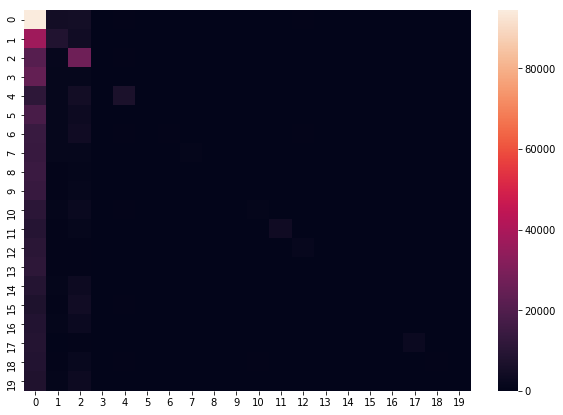

In [9]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels)], columns = [i for i in set(eng_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [10]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels, y_pred))

             precision    recall  f1-score   support

          0       0.27      0.89      0.41    106466
          1       0.28      0.16      0.20     51327
          2       0.37      0.53      0.43     50437
          3       0.29      0.01      0.02     27067
          4       0.57      0.28      0.37     24426
          5       0.28      0.00      0.01     23112
          6       0.32      0.02      0.04     21118
          7       0.39      0.05      0.08     18162
          8       0.55      0.02      0.03     16846
          9       0.34      0.00      0.00     15985
         10       0.51      0.07      0.12     15947
         11       0.74      0.25      0.37     15182
         12       0.43      0.12      0.19     13717
         13       0.70      0.01      0.02     12839
         14       0.30      0.00      0.00     13359
         15       0.70      0.02      0.04     13264
         16       0.30      0.00      0.00     12958
         17       0.76      0.21      0.33   

## Feature normalization using tf-idf

In [11]:
# pipeline used to gather counts of all words in the dataset normalized with tf-idf and vectorizes each document 
# using TfidfVectorizer; predict the labels using Multinomial Naive Bayes
pipe = Pipeline([('tfidf', TfidfVectorizer()),
                 ('clf', MultinomialNB())])

In [12]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text, eng_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.24820778  0.24892923  0.24885263  0.24815397  0.24872506]
Accuracy: 0.25 (+/- 0.00)


In [13]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,eng_text,eng_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels,y_pred)
print(conf_mat)

[[105195    415    800      2     22      0      1      1      1      0
       0     21      1      0      0      0      0      7      0      0]
 [ 49247   1215    827      1     20      0      0      1      1      0
       0     10      0      0      0      0      0      5      0      0]
 [ 37550    141  12678      0     44      0      1      0      1      0
       0     20      0      0      0      1      0      1      0      0]
 [ 26775    101    173     11      4      0      0      0      1      0
       0      1      0      0      0      0      0      1      0      0]
 [ 20911    188   1830      0   1484      0      0      0      1      0
       1     10      0      0      0      0      0      1      0      0]
 [ 22226    133    730      0      4      8      2      0      0      0
       0      8      0      0      0      0      0      1      0      0]
 [ 19942     86   1025      0     41      0     16      0      1      0
       0      6      1      0      0      0      0      0 

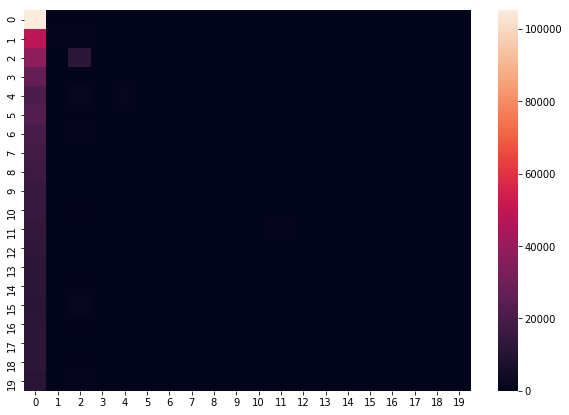

In [14]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels)], columns = [i for i in set(eng_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [15]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels, y_pred))

             precision    recall  f1-score   support

          0       0.23      0.99      0.37    106466
          1       0.39      0.02      0.04     51327
          2       0.53      0.25      0.34     50437
          3       0.69      0.00      0.00     27067
          4       0.80      0.06      0.11     24426
          5       1.00      0.00      0.00     23112
          6       0.70      0.00      0.00     21118
          7       0.86      0.00      0.00     18162
          8       0.71      0.00      0.00     16846
          9       0.00      0.00      0.00     15985
         10       0.86      0.00      0.01     15947
         11       0.89      0.06      0.11     15182
         12       0.88      0.00      0.00     13717
         13       0.75      0.00      0.00     12839
         14       0.00      0.00      0.00     13359
         15       0.96      0.00      0.00     13264
         16       0.00      0.00      0.00     12958
         17       0.89      0.01      0.03   

/Users/kennylino/.local/share/virtualenvs/emojiprediction-SvmtXtCx/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## tf-idf and part-of-speech tagging

In [16]:
# loads the spaCy English parser
parser = English()

In [17]:
# tokenizes an input tweet using the spaCy English parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [19]:
# pipeline used to gather counts of all words labeled with POS in the dataset normalized with tf-idf 
# and vectorizes each document using TfidfVectorizer; predict the labels using Multinomial Naive Bayes
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize)),
                 ('clf', MultinomialNB())])

In [20]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list with the accuracy of each fold; prints the accuracy for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text, eng_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.24573998  0.24510504  0.24584396  0.24621614  0.245961  ]
Accuracy: 0.25 (+/- 0.00)


In [21]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,eng_text,eng_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels,y_pred)
print(conf_mat)

[[106160     60    235      0      3      0      0      0      0      0
       0      8      0      0      0      0      0      0      0      0]
 [ 49723    838    750      1      6      0      0      0      0      0
       0      7      0      0      0      0      0      2      0      0]
 [ 38222     86  12100      0     22      0      0      0      0      0
       0      7      0      0      0      0      0      0      0      0]
 [ 26843     53    161      5      3      0      0      0      0      0
       0      2      0      0      0      0      0      0      0      0]
 [ 22025    107   1533      0    757      0      0      0      0      0
       1      3      0      0      0      0      0      0      0      0]
 [ 22327     87    694      0      1      0      0      0      0      0
       0      3      0      0      0      0      0      0      0      0]
 [ 20204     63    827      0     16      0      3      0      0      0
       0      5      0      0      0      0      0      0 

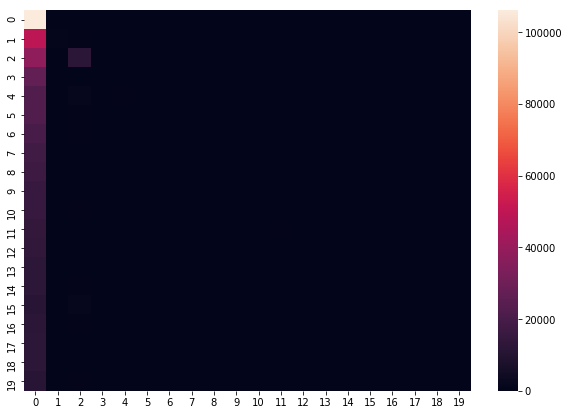

In [22]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels)], columns = [i for i in set(eng_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [23]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels, y_pred))

             precision    recall  f1-score   support

          0       0.23      1.00      0.37    106466
          1       0.48      0.02      0.03     51327
          2       0.56      0.24      0.34     50437
          3       0.62      0.00      0.00     27067
          4       0.83      0.03      0.06     24426
          5       0.00      0.00      0.00     23112
          6       0.75      0.00      0.00     21118
          7       1.00      0.00      0.00     18162
          8       1.00      0.00      0.00     16846
          9       0.00      0.00      0.00     15985
         10       0.84      0.00      0.01     15947
         11       0.90      0.03      0.06     15182
         12       0.88      0.00      0.00     13717
         13       1.00      0.00      0.00     12839
         14       0.00      0.00      0.00     13359
         15       1.00      0.00      0.00     13264
         16       0.00      0.00      0.00     12958
         17       0.93      0.00      0.01   

/Users/kennylino/.local/share/virtualenvs/emojiprediction-SvmtXtCx/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## tf-idf and bi-grams

In [24]:
# pipeline used to gather counts of bi-grams in the dataset normalized with tf-idf and vectorizes each document 
# using TfidfVectorizer; predict the labels using Multinomial Naive Bayes
pipe = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,2))),
                 ('clf', MultinomialNB())])

In [25]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text, eng_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.24227282  0.2429227   0.2427231   0.24197332  0.24303374]
Accuracy: 0.24 (+/- 0.00)


In [26]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,eng_text,eng_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels,y_pred)
print(conf_mat)

[[105935    107    356      3     13      0      0      0      1      0
       0     29      1      0      0      0      0     21      0      0]
 [ 50315    538    439      0     17      0      0      0      0      0
       0      8      0      0      0      0      0     10      0      0]
 [ 40813     41   9522      0     41      0      0      0      1      0
       0     15      0      0      0      1      0      3      0      0]
 [ 26943     19     87      7      4      0      0      0      2      0
       0      2      2      0      0      0      0      1      0      0]
 [ 21854     48    935      0   1584      0      0      0      0      0
       0      4      0      0      0      0      0      1      0      0]
 [ 22635     24    438      0      4      5      0      0      0      0
       0      6      0      0      0      0      0      0      0      0]
 [ 20493     21    556      0     34      0      4      0      1      0
       0      6      3      0      0      0      0      0 

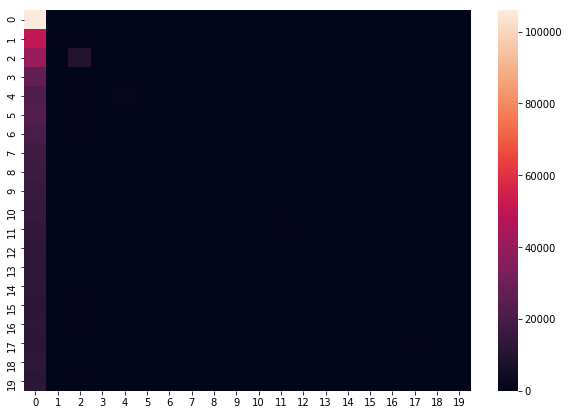

In [27]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels)], columns = [i for i in set(eng_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [28]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels, y_pred))

             precision    recall  f1-score   support

          0       0.23      1.00      0.37    106466
          1       0.56      0.01      0.02     51327
          2       0.61      0.19      0.29     50437
          3       0.58      0.00      0.00     27067
          4       0.83      0.06      0.12     24426
          5       1.00      0.00      0.00     23112
          6       1.00      0.00      0.00     21118
          7       1.00      0.00      0.00     18162
          8       0.71      0.00      0.00     16846
          9       0.00      0.00      0.00     15985
         10       1.00      0.00      0.00     15947
         11       0.87      0.04      0.09     15182
         12       0.80      0.00      0.01     13717
         13       1.00      0.00      0.00     12839
         14       0.00      0.00      0.00     13359
         15       0.94      0.00      0.00     13264
         16       0.00      0.00      0.00     12958
         17       0.90      0.04      0.07   

/Users/kennylino/.local/share/virtualenvs/emojiprediction-SvmtXtCx/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## tf-idf, bi-grams and part-of-speech tagging

In [29]:
# loads the spaCy English parser
parser = English()

In [30]:
# tokenizes an input tweet using the spaCy English parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [32]:
# pipeline used to gather counts of all bi-grams with each word labeled with POS in the dataset; 
# this is then normalized with tf-idf and each document is vectorized using TfidfVectorizer; 
# predict the labels using Multinomial Naive Bayes
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize, ngram_range=(1,2))),
                 ('clf', MultinomialNB())])

In [33]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text, eng_labels, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.24490379  0.24496227  0.24495665  0.24506364  0.24491045]
Accuracy: 0.24 (+/- 0.00)


In [34]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds and returns
# a list containing the predictions for each label; this is used in a confusion matrix
y_pred = cross_val_predict(pipe,eng_text,eng_labels,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels,y_pred)
print(conf_mat)

[[106251     38    153      1      3      0      0      0      0      0
       3     13      0      0      0      0      0      4      0      0]
 [ 50118    659    513      1     10      0      0      0      0      0
       1     15      0      0      0      0      0     10      0      0]
 [ 39862     58  10471      0     26      0      0      0      0      0
       0     18      0      0      0      1      0      1      0      0]
 [ 26941     21     92      5      3      0      0      1      1      0
       0      3      0      0      0      0      0      0      0      0]
 [ 22291     61    900      0   1168      0      0      0      0      0
       2      4      0      0      0      0      0      0      0      0]
 [ 22525     43    534      0      3      1      0      0      0      0
       0      4      0      0      0      0      0      2      0      0]
 [ 20404     52    626      0     23      0      3      0      1      0
       0      8      1      0      0      0      0      0 

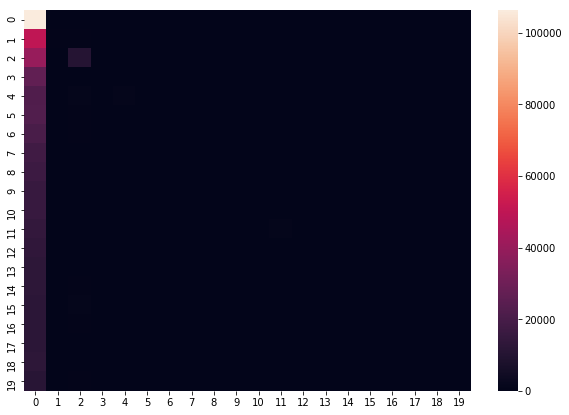

In [35]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels)], columns = [i for i in set(eng_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [36]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels, y_pred))

             precision    recall  f1-score   support

          0       0.23      1.00      0.37    106466
          1       0.56      0.01      0.03     51327
          2       0.61      0.21      0.31     50437
          3       0.56      0.00      0.00     27067
          4       0.84      0.05      0.09     24426
          5       1.00      0.00      0.00     23112
          6       1.00      0.00      0.00     21118
          7       0.91      0.00      0.00     18162
          8       0.69      0.00      0.00     16846
          9       0.00      0.00      0.00     15985
         10       0.70      0.01      0.01     15947
         11       0.89      0.06      0.11     15182
         12       0.86      0.00      0.00     13717
         13       1.00      0.00      0.00     12839
         14       0.00      0.00      0.00     13359
         15       0.94      0.00      0.00     13264
         16       0.00      0.00      0.00     12958
         17       0.92      0.03      0.06   

/Users/kennylino/.local/share/virtualenvs/emojiprediction-SvmtXtCx/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## tf-idf, bi-grams and part-of-speech tagging with balanced dataset

In [7]:
# puts the English text and labels data into a pandas DataFrame
eng_data_df = pd.DataFrame([eng_text, eng_labels]).transpose()
eng_data_df.columns = (['text', 'label'])

In [8]:
# collects a random sample of each category based on the frequency of the least common set
# e.g. category 19 has 12197 items, so a sample of 12197 tweets from each category
eng_data_balanced = pd.concat([eng_data_df[eng_data_df.label == i].sample(12197) for i in range(0,20)])
eng_data_balanced

,text,label
49847,Love is all you need # ️ @ Downtown Miami,0
255815,My dreams have come true! It's a giant #kirby ...,0
208768,These are a few of my favorite things ️ ️ joan...,0
6505,This guy. This place. ️ ️ ️ #movember #palodur...,0
93077,St. Louis Ribs at charlieandjakesbeachside -- ...,0
315923,Farewell drink with the Zeno group. I'll miss ...,0
33228,Feels so good to be back (and this time to sta...,0
83512,That's my spot dood....lol ️️ #socialmedia #so...,0
466450,Because I ️ this. #mondaymotivation #god #thed...,0
290952,An afternoon date with a very pretty girl ️ #s...,0


In [39]:
# takes the data from the eng_data_balanced DataFrame and converts the text/labels into Python arrays
eng_text_balanced = eng_data_balanced['text'].tolist()
eng_labels_balanced = eng_data_balanced['label'].tolist()

In [40]:
# asserts that the number of tweets and labels are equal
assert len(eng_text_balanced) == len(eng_labels_balanced)

In [41]:
# shuffle the dataset with the same seed
np.random.seed(42)
np.random.shuffle(eng_text_balanced)
np.random.seed(42)
np.random.shuffle(eng_labels_balanced)

In [42]:
# loads the spaCy English parser
parser = English()

In [43]:
# tokenizes an input tweet using the spaCy English parser;
# returns a list of tokenized words with the POS tag attached to the word in 'word_POS' format
def spacy_tokenize(tweet):
    tokens = parser(tweet)
    tokens = [token.text +'_' + token.pos_ for token in tokens]
    return tokens

In [45]:
# pipeline used to gather counts of all bi-grams with each word labeled with POS in the dataset; 
# this is then normalized with tf-idf and each document is vectorized using TfidfVectorizer; 
# predict the labels using Multinomial Naive Bayes
pipe = Pipeline([('tfidf', TfidfVectorizer(tokenizer=spacy_tokenize, ngram_range=(1,2))),
                 ('clf', MultinomialNB())])

In [46]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
scores = cross_val_score(pipe, eng_text_balanced, eng_labels_balanced, cv=5, n_jobs=-1)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.32897541  0.33489754  0.33093481  0.32945879  0.33312833]
Accuracy: 0.33 (+/- 0.00)


In [47]:
# Crossvalidates the performance of the above pipe on the English data/labels using 5 folds
# prints the scores for each cross-section and the average accuracy
y_pred = cross_val_predict(pipe,eng_text_balanced,eng_labels_balanced,cv=5, n_jobs=-1)
conf_mat = confusion_matrix(eng_labels_balanced,y_pred)
print(conf_mat)

[[6832  210  185  455  102  190   51  214  144  481  105  292 1838  146
   312   84  168  239   96   53]
 [ 241 1908  666 1134  367  680  243  636  462 1097  348  646  645  364
   745  205  865  411  271  263]
 [  61  294 4548  344  408  468  273  226  201  483  228  421  318  146
  1353  593  648  356  280  548]
 [ 281  565  341 3538  175  504  146  649  738 1564  232  370  590  676
   614  184  289  352  230  159]
 [  61  287  605  330 5410  246  276  330  218  350  413  406  344  167
   643  695  364  312  483  257]
 [ 145  530  849 1069  269 1501  283  453  394 1121  215  568  747  334
  1230  204 1134  556  234  361]
 [  83  335  755  528  717  587 1108  448  382  528  349  812 1406  224
  1147  636  914  403  371  464]
 [  97  425  390  863  599  436  262 3155  297  544  519  604  666  306
   922  325  366  673  542  206]
 [ 259  463  368 1935  235  481  190  592 2201 1046  227  660  904  598
   654  256  337  369  244  178]
 [ 203  460  503 1688  261  581  193  340  403 3653  23

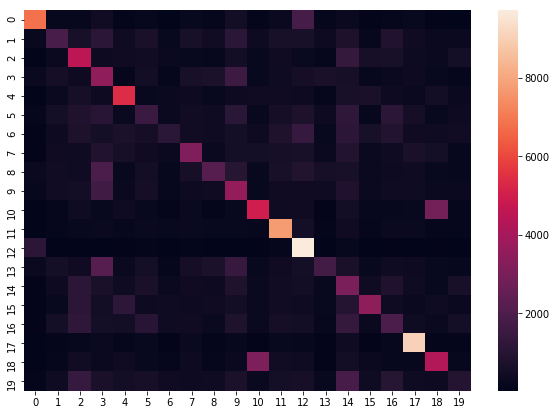

In [48]:
# visualizes the above confusion matrix
df_cm = pd.DataFrame(conf_mat, index = [i for i in set(eng_labels)], columns = [i for i in set(eng_labels)])
plt.figure(figsize= (10,7))
sn.heatmap(df_cm, annot=False)

In [49]:
# prints a report detailing precision/recall and f-score of the pipeline
print(classification_report(eng_labels_balanced, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.56      0.61     12197
          1       0.23      0.16      0.19     12197
          2       0.29      0.37      0.32     12197
          3       0.20      0.29      0.24     12197
          4       0.43      0.44      0.44     12197
          5       0.15      0.12      0.14     12197
          6       0.21      0.09      0.13     12197
          7       0.30      0.26      0.28     12197
          8       0.27      0.18      0.22     12197
          9       0.23      0.30      0.26     12197
         10       0.40      0.41      0.40     12197
         11       0.47      0.64      0.54     12197
         12       0.45      0.80      0.57     12197
         13       0.28      0.14      0.19     12197
         14       0.16      0.25      0.20     12197
         15       0.39      0.29      0.33     12197
         16       0.18      0.16      0.17     12197
         17       0.58      0.74      0.65   